# Cálculo de la frecuencia cardiaca a partir del artículo "How to Design Peripheral Oxygen Saturation (SpO2) and Optical Heart Rate Monitoring (OHRM) Systems Using the AFE4403"

Puntos clave para la extracción de la frecuencia cardíaca a partir de los datos del pulsioxímetro:

### Adquisición de la señal PPG:

- Explica cómo la luz de los LEDs (rojo e infrarrojo) interactúa con los tejidos y la sangre.

- Menciona que el componente pulsátil de la señal (AC) representa la absorción en la sangre arterial, mientras que el componente DC proviene de otros tejidos.

- La periodicidad de la señal PPG está directamente relacionada con la frecuencia cardíaca.

### Impacto de la ganancia y la corriente LED:

- El documento habla sobre cómo la señal se ve afectada por los ajustes del AFE4403, lo que puede ser útil para interpretar los datos crudos que tienes.

- Aumentar la corriente del LED aumenta la señal DC, pero demasiado puede saturarla.

- La ganancia del amplificador de transimpedancia (TIA) también influye en la calidad de la señal.

### Postprocesamiento para extracción de la frecuencia cardíaca:

- Sugiere aplicar filtros para eliminar el ruido de la red eléctrica (60 Hz) y artefactos de movimiento.

- Se puede calcular la frecuencia cardíaca midiendo la separación entre los picos sucesivos de la señal PPG.

- Si hay artefactos de movimiento, se recomienda usar algoritmos de cancelación de ruido (por ejemplo, basados en acelerómetros).

## Posibles acciones a tomar:
- Filtrado: Asegurar que aplicas un filtrado adecuado, como un paso banda centrado en la frecuencia cardíaca esperada (~0.5 - 3 Hz).

- Detección de picos: Puedes probar diferentes métodos para detectar los picos en la señal PPG, como derivadas o transformada de wavelet.

- Corrección de la señal DC: Si la señal tiene cambios bruscos de DC (por movimiento o variaciones en el sensor), puedes probar algoritmos de normalización o filtrado adaptativo.

## 1. Filtro Butterworth
El filtro Butterworth es un filtro paso banda, diseñado para pasar las frecuencias de interés (en este caso, la frecuencia cardíaca) y atenuar las frecuencias fuera de ese rango. Se usa para eliminar componentes de baja y alta frecuencia que no son útiles para la estimación de la frecuencia cardíaca, como las fluctuaciones debidas a la respiración o el movimiento.

El artículo menciona la importancia de filtrar el ruido y eliminación de la deriva en la señal. En este contexto, un filtro paso banda como el Butterworth es útil para eliminar interferencias como el ruido de línea de 60 Hz y las variaciones del DC. Esto se conecta directamente con las recomendaciones del artículo sobre el filtrado de la señal PPG y la detección de la frecuencia cardíaca.


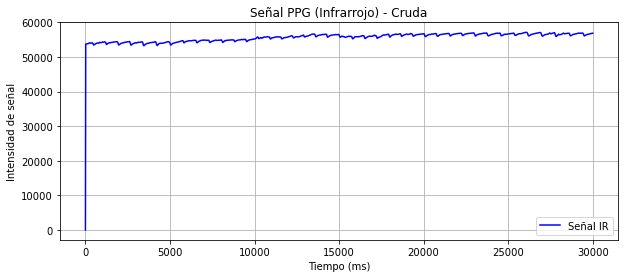

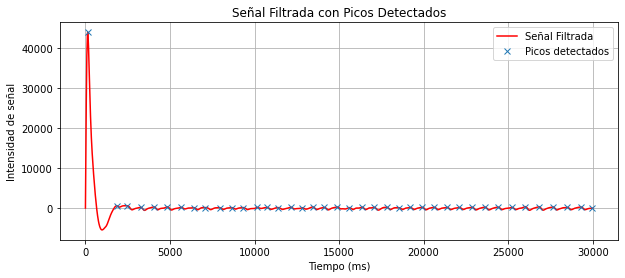

Frecuencia cardíaca estimada: 78.49 bpm


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# 1. Cargar los datos
file_path = file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_95_77_2.csv"
df = pd.read_csv(file_path, sep=";")

# 2. Visualizar la señal PPG (IR)
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR"], label="Señal IR", color="blue")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal PPG (Infrarrojo) - Cruda")
plt.legend()
plt.grid(True)
plt.show()

# 3. Filtrar la señal (Paso banda 0.5 - 3 Hz)
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut=0.5, highcut=3.0, fs=60, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    return filtfilt(b, a, data)

fs = 1000 / (df_recortado["Tiempo (ms)"].diff().mean())  # Calcular frecuencia de muestreo
df["IR_filtrada"] = bandpass_filter(df["IR"], fs=fs)

# 4. Detectar picos para calcular la frecuencia cardíaca
peaks, _ = find_peaks(df["IR_filtrada"], distance=fs/2)  # Separación mínima de 0.5s (~30 latidos/min)

# Graficar señal filtrada y picos detectados
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR_filtrada"], label="Señal Filtrada", color="red")
plt.plot(df["Tiempo (ms)"].iloc[peaks], df["IR_filtrada"].iloc[peaks], "x", label="Picos detectados")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal Filtrada con Picos Detectados")
plt.legend()
plt.grid(True)
plt.show()

# 5. Calcular frecuencia cardíaca
rr_intervals = df["Tiempo (ms)"].iloc[peaks].diff().dropna()  # Diferencias entre picos
global_hr = 60000 / rr_intervals.mean()  # Convertir a latidos por minuto (bpm)
print(f"Frecuencia cardíaca estimada: {global_hr:.2f} bpm")

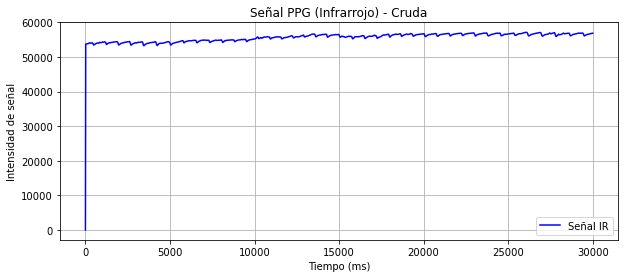

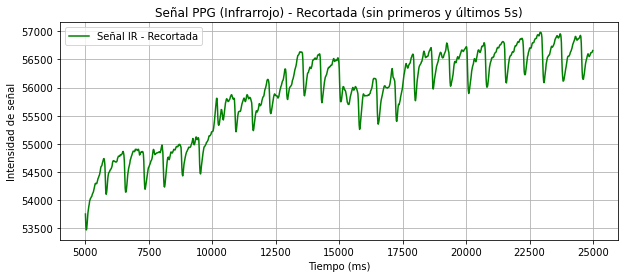

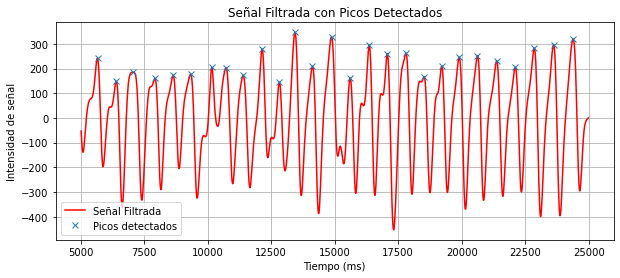

Frecuencia cardíaca estimada: 83.33 bpm


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# 1. Cargar los datos
file_path = file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_95_77_2.csv"
df = pd.read_csv(file_path, sep=";")

# 2. Visualizar la señal PPG (IR)
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR"], label="Señal IR", color="blue")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal PPG (Infrarrojo) - Cruda")
plt.legend()
plt.grid(True)
plt.show()


df_recortado = df[(df["Tiempo (ms)"] >= t_inicio) & (df["Tiempo (ms)"] <= t_final)].reset_index(drop=True)

# Visualizar la señal recortada
plt.figure(figsize=(10, 4))
plt.plot(df_recortado["Tiempo (ms)"], df_recortado["IR"], label="Señal IR - Recortada", color="green")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal PPG (Infrarrojo) - Recortada (sin primeros y últimos 5s)")
plt.legend()
plt.grid(True)
plt.show()

# 3. Filtrar la señal (Paso banda 0.5 - 3 Hz)
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut=0.5, highcut=3.0, fs=60, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    return filtfilt(b, a, data)

fs = 1000 / (df_recortado["Tiempo (ms)"].diff().mean())  # Calcular frecuencia de muestreo
df_recortado["IR_filtrada"] = bandpass_filter(df_recortado["IR"], fs=fs)

# 4. Detectar picos para calcular la frecuencia cardíaca
peaks, _ = find_peaks(df_recortado["IR_filtrada"], distance=fs/2)  # Separación mínima de 0.5s (~30 latidos/min)

# Graficar señal filtrada y picos detectados
plt.figure(figsize=(10, 4))
plt.plot(df_recortado["Tiempo (ms)"], df_recortado["IR_filtrada"], label="Señal Filtrada", color="red")
plt.plot(df_recortado["Tiempo (ms)"].iloc[peaks], df_recortado["IR_filtrada"].iloc[peaks], "x", label="Picos detectados")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal Filtrada con Picos Detectados")
plt.legend()
plt.grid(True)
plt.show()

# 5. Calcular frecuencia cardíaca
rr_intervals = df_recortado["Tiempo (ms)"].iloc[peaks].diff().dropna()  # Diferencias entre picos
global_hr = 60000 / rr_intervals.mean()  # Convertir a latidos por minuto (bpm)
print(f"Frecuencia cardíaca estimada: {global_hr:.2f} bpm")


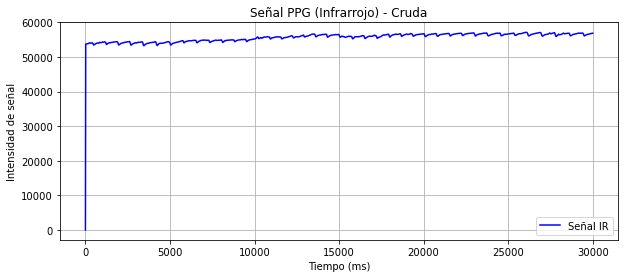

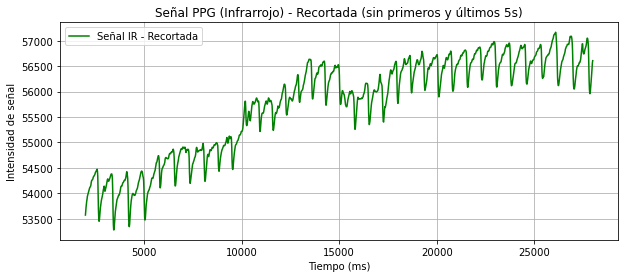

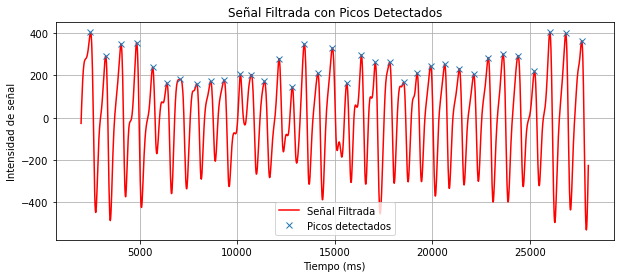

Frecuencia cardíaca estimada: 81.06 bpm


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# 1. Cargar los datos
file_path = file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_95_77_2.csv"
df = pd.read_csv(file_path, sep=";")

# 2. Visualizar la señal PPG (IR)
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR"], label="Señal IR", color="blue")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal PPG (Infrarrojo) - Cruda")
plt.legend()
plt.grid(True)
plt.show()

# Obtener el tiempo inicial y final
t_inicio = df["Tiempo (ms)"].iloc[0] + 2000  # +5 segundos
t_final = df["Tiempo (ms)"].iloc[-1] - 2000  # -5 segundos
df_recortado = df[(df["Tiempo (ms)"] >= t_inicio) & (df["Tiempo (ms)"] <= t_final)].reset_index(drop=True)

# Visualizar la señal recortada
plt.figure(figsize=(10, 4))
plt.plot(df_recortado["Tiempo (ms)"], df_recortado["IR"], label="Señal IR - Recortada", color="green")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal PPG (Infrarrojo) - Recortada (sin primeros y últimos 5s)")
plt.legend()
plt.grid(True)
plt.show()

# 3. Filtrar la señal (Paso banda 0.5 - 3 Hz)
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut=0.5, highcut=3.0, fs=60, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    return filtfilt(b, a, data)

fs = 1000 / (df_recortado["Tiempo (ms)"].diff().mean())  # Calcular frecuencia de muestreo
df_recortado["IR_filtrada"] = bandpass_filter(df_recortado["IR"], fs=fs)

# 4. Detectar picos para calcular la frecuencia cardíaca
peaks, _ = find_peaks(df_recortado["IR_filtrada"], distance=fs/2)  # Separación mínima de 0.5s (~30 latidos/min)

# Graficar señal filtrada y picos detectados
plt.figure(figsize=(10, 4))
plt.plot(df_recortado["Tiempo (ms)"], df_recortado["IR_filtrada"], label="Señal Filtrada", color="red")
plt.plot(df_recortado["Tiempo (ms)"].iloc[peaks], df_recortado["IR_filtrada"].iloc[peaks], "x", label="Picos detectados")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal Filtrada con Picos Detectados")
plt.legend()
plt.grid(True)
plt.show()

# 5. Calcular frecuencia cardíaca
rr_intervals = df_recortado["Tiempo (ms)"].iloc[peaks].diff().dropna()  # Diferencias entre picos
global_hr = 60000 / rr_intervals.mean()  # Convertir a latidos por minuto (bpm)
print(f"Frecuencia cardíaca estimada: {global_hr:.2f} bpm")


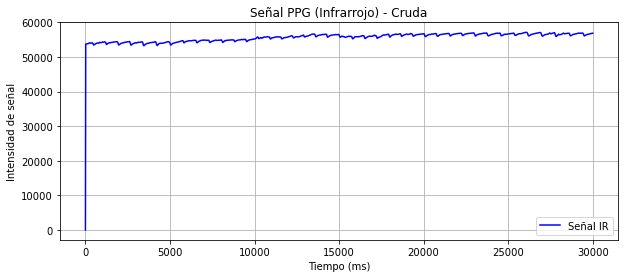

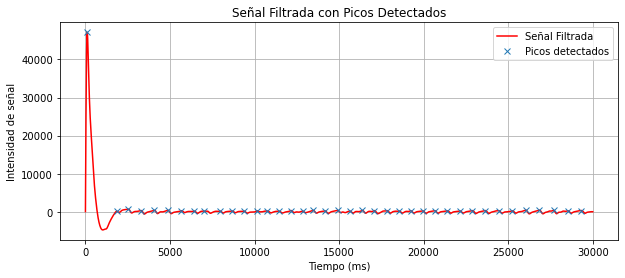

Frecuencia cardíaca estimada: 78.00 BPM


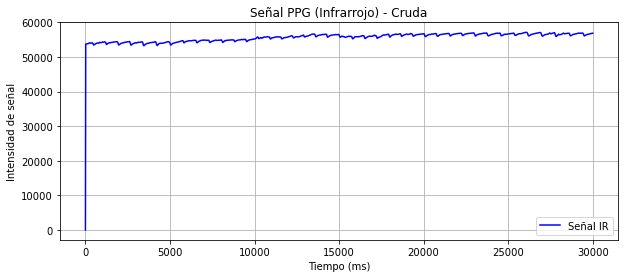

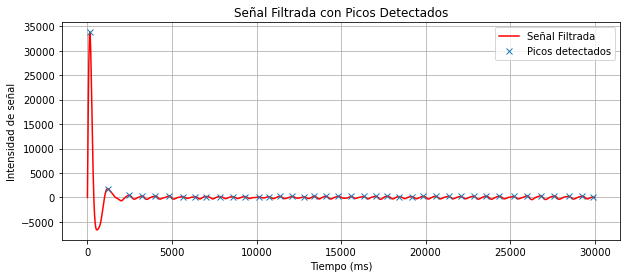

Frecuencia cardíaca estimada: 78.66 BPM


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# 1. Cargar los datos
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# 1. Cargar los datos
file_path = file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_95_77_2.csv"
df = pd.read_csv(file_path, sep=";")

# 2. Visualizar la señal PPG (IR)
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR"], label="Señal IR", color="blue")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal PPG (Infrarrojo) - Cruda")
plt.legend()
plt.grid(True)
plt.show()

# 3. Filtrar la señal (Paso banda 0.8 - 2.5 Hz)
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut=0.48, highcut=4, fs=60, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    return filtfilt(b, a, data)

fs = 1000 / (df["Tiempo (ms)"].diff().mean())  # Calcular frecuencia de muestreo
df["IR_filtrada"] = bandpass_filter(df["IR"], fs=fs)

# 4. Detectar picos con umbral dinámico
threshold = df["IR_filtrada"].median() * 1.2  # Umbral basado en la mediana de la señal filtrada
peaks, _ = find_peaks(df["IR_filtrada"], height=threshold, distance=fs/2)  # Separación mínima de 0.5s (~30 BPM)

# Graficar señal filtrada y picos detectados
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR_filtrada"], label="Señal Filtrada", color="red")
plt.plot(df["Tiempo (ms)"].iloc[peaks], df["IR_filtrada"].iloc[peaks], "x", label="Picos detectados")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal Filtrada con Picos Detectados")
plt.legend()
plt.grid(True)
plt.show()

# 5. Calcular frecuencia cardíaca
rr_intervals = df["Tiempo (ms)"].iloc[peaks].diff().dropna()  # Diferencias entre picos
global_hr = 60000 / rr_intervals.mean()  # Convertir a latidos por minuto (BPM)
print(f"Frecuencia cardíaca estimada: {global_hr:.2f} BPM")


# 2. Visualizar la señal PPG (IR)
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR"], label="Señal IR", color="blue")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal PPG (Infrarrojo) - Cruda")
plt.legend()
plt.grid(True)
plt.show()

# 3. Filtrar la señal (Paso banda 0.8 - 2.5 Hz)
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut=0.8, highcut=2.5, fs=60, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    return filtfilt(b, a, data)

fs = 1000 / (df["Tiempo (ms)"].diff().mean())  # Calcular frecuencia de muestreo
df["IR_filtrada"] = bandpass_filter(df["IR"], fs=fs)

# 4. Detectar picos con umbral dinámico
threshold = df["IR_filtrada"].median() * 1.2  # Umbral basado en la mediana de la señal filtrada
peaks, _ = find_peaks(df["IR_filtrada"], height=threshold, distance=fs/2)  # Separación mínima de 0.5s (~30 BPM)

# Graficar señal filtrada y picos detectados
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR_filtrada"], label="Señal Filtrada", color="red")
plt.plot(df["Tiempo (ms)"].iloc[peaks], df["IR_filtrada"].iloc[peaks], "x", label="Picos detectados")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal Filtrada con Picos Detectados")
plt.legend()
plt.grid(True)
plt.show()

# 5. Calcular frecuencia cardíaca
rr_intervals = df["Tiempo (ms)"].iloc[peaks].diff().dropna()  # Diferencias entre picos
global_hr = 60000 / rr_intervals.mean()  # Convertir a latidos por minuto (BPM)
print(f"Frecuencia cardíaca estimada: {global_hr:.2f} BPM")


# Filtro de Savitzky-Golay
El filtro Savitzky-Golay es un filtro de suavizado polinómico que preserva las características de la señal, especialmente los picos, mientras reduce el ruido. En el código, se usa para suavizar la señal PPG (IR) antes de detectar los picos. Este filtro es útil cuando se quiere suavizar la señal sin perder las variaciones rápidas, como los latidos del corazón, lo cual es importante para las aplicaciones de monitorización de la frecuencia cardíaca.

El artículo menciona que uno de los desafíos en la medición de la frecuencia cardíaca es eliminar el ruido y las variaciones lentas de la señal, especialmente debido a artefactos de movimiento y fluctuaciones de la luz ambiente. El filtro Savitzky-Golay ayuda a reducir ese ruido, como el mencionado en la sección sobre post procesamiento y cancelación de artefactos​

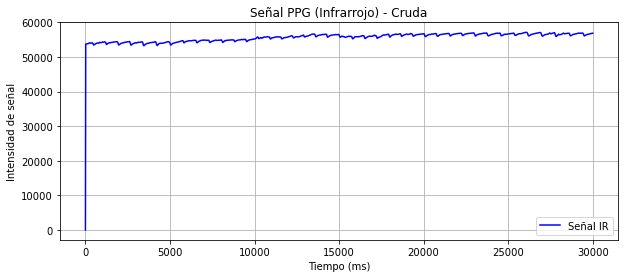

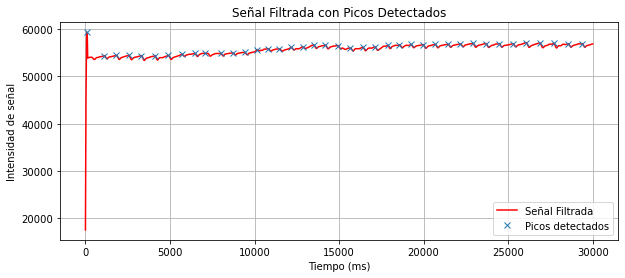

Frecuencia cardíaca estimada: 79.91 BPM


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks

# 1. Cargar los datos
file_path = file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_95_77_2.csv"
df = pd.read_csv(file_path, sep=";")

# 2. Visualizar la señal PPG (IR)
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR"], label="Señal IR", color="blue")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal PPG (Infrarrojo) - Cruda")
plt.legend()
plt.grid(True)
plt.show()

# 3. Calcular frecuencia de muestreo (fs)
fs = 1000 / df["Tiempo (ms)"].diff().mean()  # Convertir de ms a Hz

# 4. Aplicar filtro Savitzky-Golay (ventana de 15 muestras, polinomio de orden 3)
df["IR_filtrada"] = savgol_filter(df["IR"], window_length=15, polyorder=3)

# 5. Detectar picos con umbral dinámico
threshold = df["IR_filtrada"].median() * 1.1  # Umbral inicial
peaks, _ = find_peaks(df["IR_filtrada"], height=threshold, distance=fs/2)

# Si no se detectan picos, ajustar el umbral dinámicamente
if len(peaks) == 0:
    threshold = df["IR_filtrada"].median() * 0.9  # Reducir umbral
    peaks, _ = find_peaks(df["IR_filtrada"], height=threshold, distance=fs/2)

# Graficar señal filtrada y picos detectados
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR_filtrada"], label="Señal Filtrada", color="red")
plt.plot(df["Tiempo (ms)"].iloc[peaks], df["IR_filtrada"].iloc[peaks], "x", label="Picos detectados")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal Filtrada con Picos Detectados")
plt.legend()
plt.grid(True)
plt.show()

# 6. Calcular frecuencia cardíaca solo si hay picos detectados
if len(peaks) > 1:
    rr_intervals = df["Tiempo (ms)"].iloc[peaks].diff().dropna()  # Diferencias entre picos
    global_hr = 60000 / rr_intervals.mean()  # Convertir a latidos por minuto (BPM)
    print(f"Frecuencia cardíaca estimada: {global_hr:.2f} BPM")
else:
    print("No se detectaron suficientes picos para calcular la frecuencia cardíaca.")


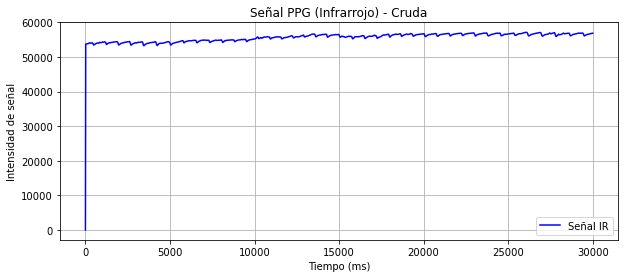

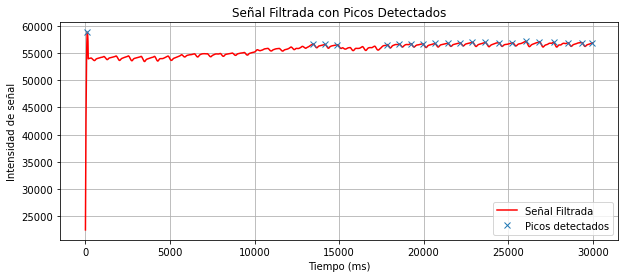

Frecuencia cardíaca estimada: 78.33 BPM


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks

# 1. Cargar los datos
file_path = file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_95_77_2.csv"
df = pd.read_csv(file_path, sep=";")

# 2. Visualizar la señal PPG (IR)
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR"], label="Señal IR", color="blue")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal PPG (Infrarrojo) - Cruda")
plt.legend()
plt.grid(True)
plt.show()

# 3. Calcular frecuencia de muestreo (fs)
fs = 1000 / df["Tiempo (ms)"].diff().mean()  # Convertir de ms a Hz

# 4. Aplicar filtro Savitzky-Golay (ventana de 21 muestras, polinomio de orden 2)
df["IR_filtrada"] = savgol_filter(df["IR"], window_length=21, polyorder=2)

# 5. Detectar picos con umbral dinámico optimizado
threshold = df["IR_filtrada"].mean() + 0.6 * df["IR_filtrada"].std()  # Umbral basado en la media y desviación estándar
peaks, _ = find_peaks(df["IR_filtrada"], height=threshold, distance=fs/2.2)  # Ajuste fino del parámetro distance

# Si no se detectan suficientes picos, reducir el umbral
if len(peaks) < 3:
    threshold = df["IR_filtrada"].mean() + 0.4 * df["IR_filtrada"].std()
    peaks, _ = find_peaks(df["IR_filtrada"], height=threshold, distance=fs/2.2)

# Graficar señal filtrada y picos detectados
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR_filtrada"], label="Señal Filtrada", color="red")
plt.plot(df["Tiempo (ms)"].iloc[peaks], df["IR_filtrada"].iloc[peaks], "x", label="Picos detectados")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal Filtrada con Picos Detectados")
plt.legend()
plt.grid(True)
plt.show()

# 6. Calcular frecuencia cardíaca con eliminación de valores extremos
if len(peaks) > 1:
    rr_intervals = df["Tiempo (ms)"].iloc[peaks].diff().dropna()
    rr_intervals = rr_intervals[(rr_intervals > rr_intervals.quantile(0.1)) & (rr_intervals < rr_intervals.quantile(0.9))]  # Filtrar valores extremos
    global_hr = 60000 / rr_intervals.median()  # Usar mediana en lugar de media para mayor precisión
    print(f"Frecuencia cardíaca estimada: {global_hr:.2f} BPM")
else:
    print("No se detectaron suficientes picos para calcular la frecuencia cardíaca.")


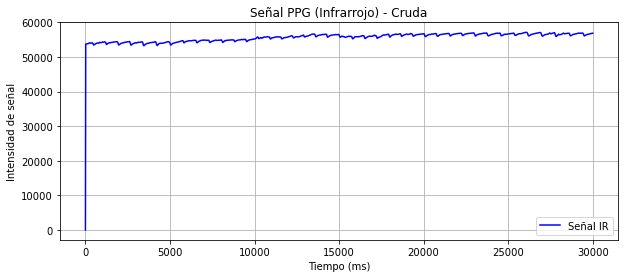

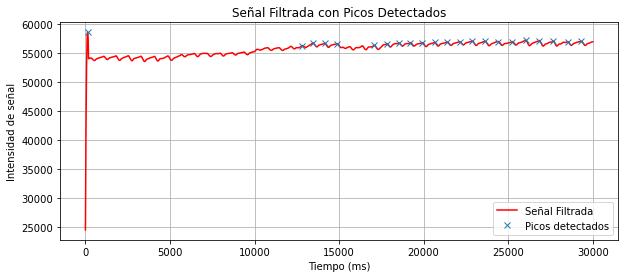

Frecuencia cardíaca estimada: 80.00 BPM


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks
import numpy as np

# 1. Cargar los datos
# 1. Cargar los datos
file_path = file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_95_77_2.csv"
df = pd.read_csv(file_path, sep=";")
# 2. Visualizar la señal PPG (IR)
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR"], label="Señal IR", color="blue")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal PPG (Infrarrojo) - Cruda")
plt.legend()
plt.grid(True)
plt.show()

# 3. Calcular frecuencia de muestreo (fs)
fs = 1000 / df["Tiempo (ms)"].diff().mean()  # Convertir de ms a Hz

# 4. Aplicar filtro Savitzky-Golay (ventana de 21 muestras, polinomio de orden 3)
df["IR_filtrada"] = savgol_filter(df["IR"], window_length=21, polyorder=3)

# 5. Detectar picos con umbral más bajo y mayor separación entre picos
threshold = df["IR_filtrada"].mean() + 0.4 * df["IR_filtrada"].std()  # Reducir umbral
peaks, _ = find_peaks(df["IR_filtrada"], height=threshold, distance=fs/1.6)  # Aumentar distancia entre picos

# Si no se detectan suficientes picos, ajustar el umbral
if len(peaks) < 3:
    threshold = df["IR_filtrada"].mean() + 0.2 * df["IR_filtrada"].std()
    peaks, _ = find_peaks(df["IR_filtrada"], height=threshold, distance=fs/1.6)

# Graficar señal filtrada y picos detectados
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR_filtrada"], label="Señal Filtrada", color="red")
plt.plot(df["Tiempo (ms)"].iloc[peaks], df["IR_filtrada"].iloc[peaks], "x", label="Picos detectados")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal Filtrada con Picos Detectados")
plt.legend()
plt.grid(True)
plt.show()

# 6. Calcular frecuencia cardíaca con eliminación de valores extremos
if len(peaks) > 1:
    rr_intervals = df["Tiempo (ms)"].iloc[peaks].diff().dropna()
    rr_intervals = rr_intervals[(rr_intervals > rr_intervals.quantile(0.2)) & (rr_intervals < rr_intervals.quantile(0.8))]  # Filtrar valores extremos
    global_hr = 60000 / rr_intervals.median()  # Usar mediana en lugar de media para mayor precisión
    print(f"Frecuencia cardíaca estimada: {global_hr:.2f} BPM")
else:
    print("No se detectaron suficientes picos para calcular la frecuencia cardíaca.")


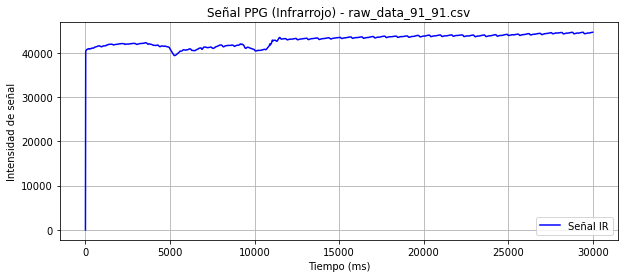

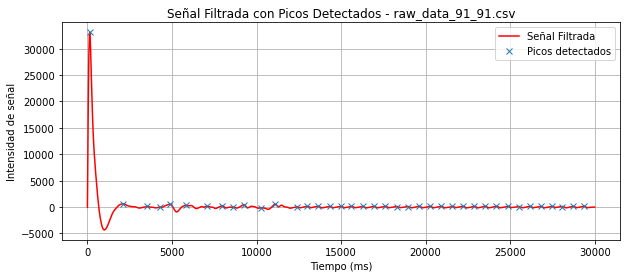

Frecuencia cardíaca estimada para raw_data_91_91.csv: 78.04 bpm


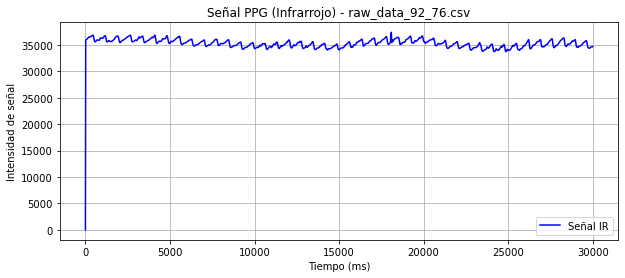

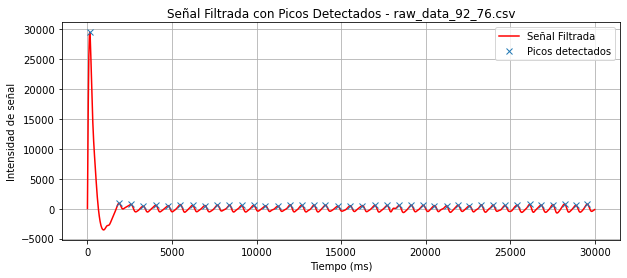

Frecuencia cardíaca estimada para raw_data_92_76.csv: 81.55 bpm


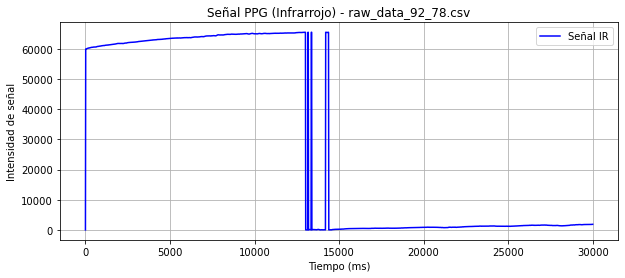

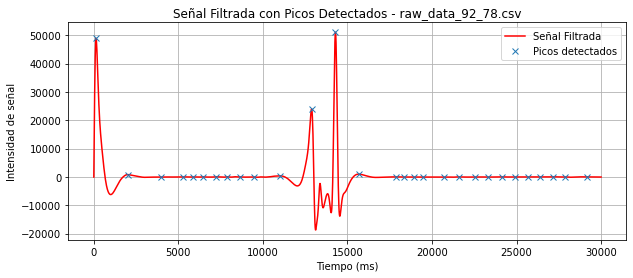

Frecuencia cardíaca estimada para raw_data_92_78.csv: 57.90 bpm


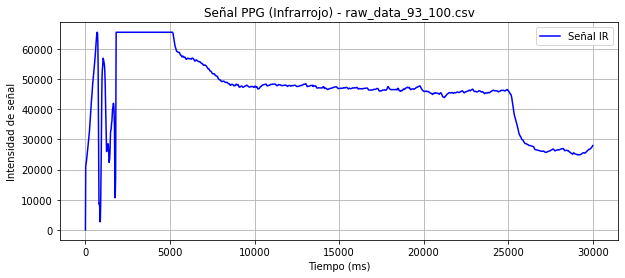

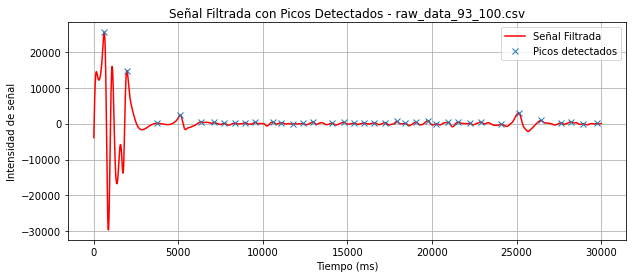

Frecuencia cardíaca estimada para raw_data_93_100.csv: 74.19 bpm


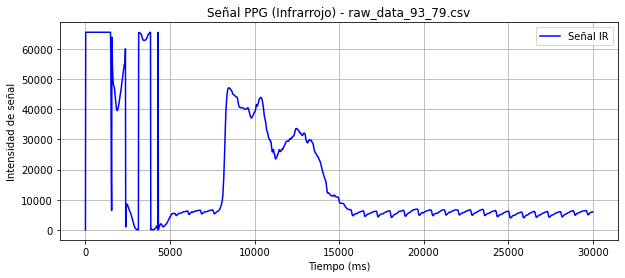

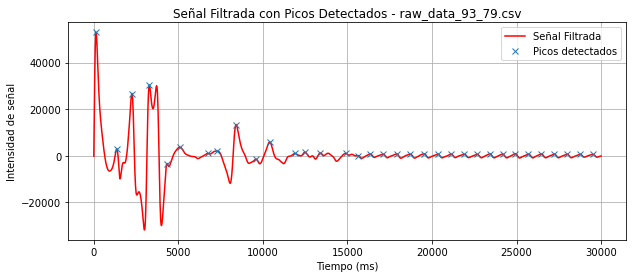

Frecuencia cardíaca estimada para raw_data_93_79.csv: 67.43 bpm


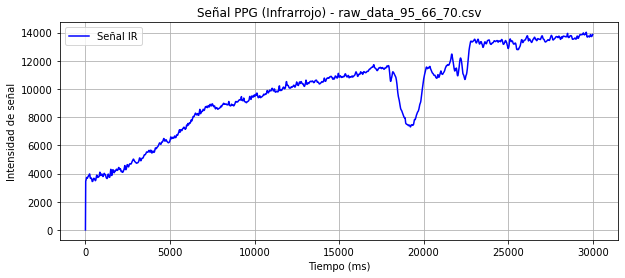

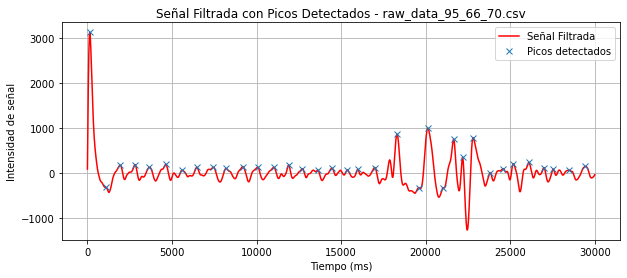

Frecuencia cardíaca estimada para raw_data_95_66_70.csv: 69.59 bpm


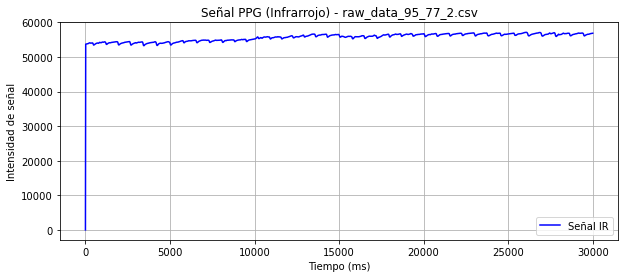

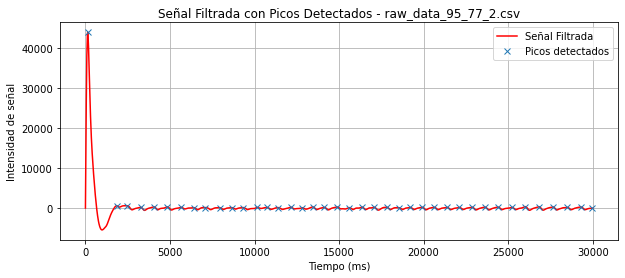

Frecuencia cardíaca estimada para raw_data_95_77_2.csv: 78.49 bpm


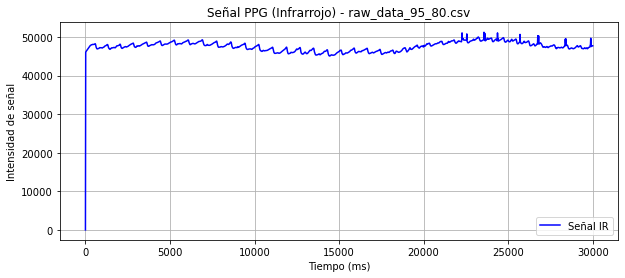

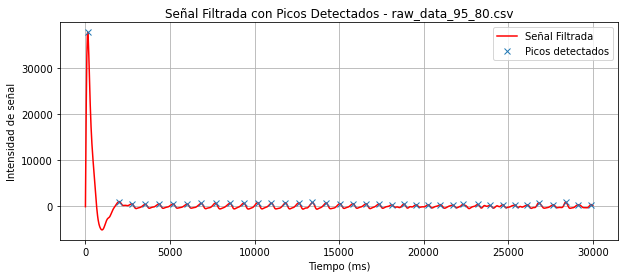

Frecuencia cardíaca estimada para raw_data_95_80.csv: 74.59 bpm


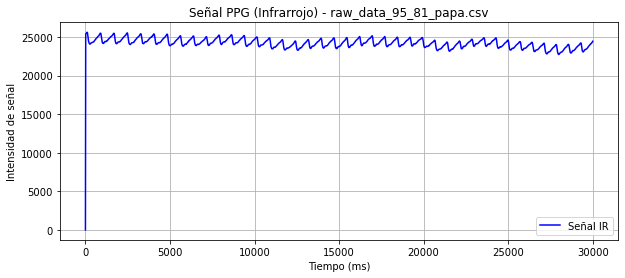

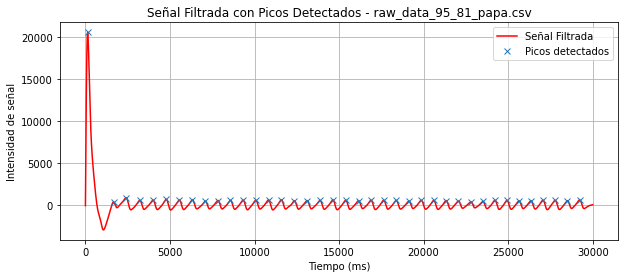

Frecuencia cardíaca estimada para raw_data_95_81_papa.csv: 78.36 bpm


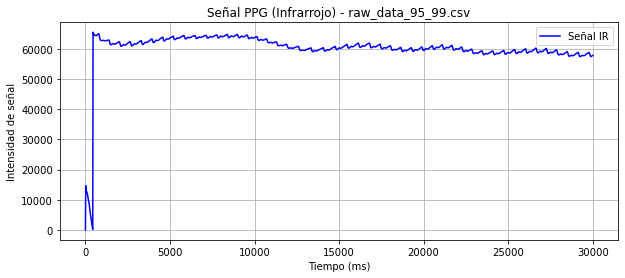

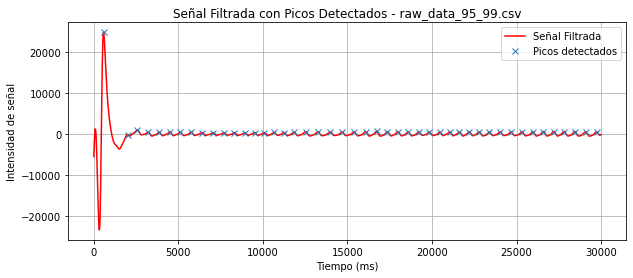

Frecuencia cardíaca estimada para raw_data_95_99.csv: 92.63 bpm


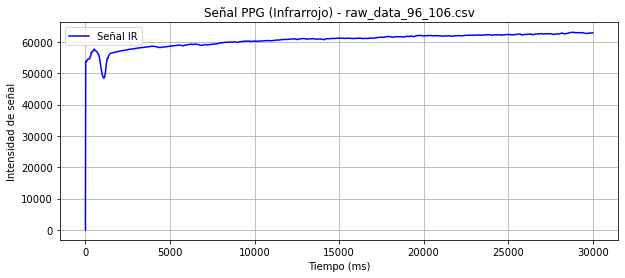

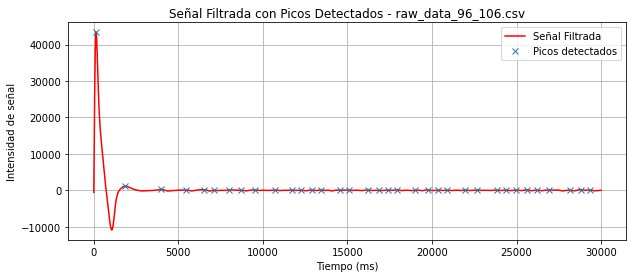

Frecuencia cardíaca estimada para raw_data_96_106.csv: 69.91 bpm


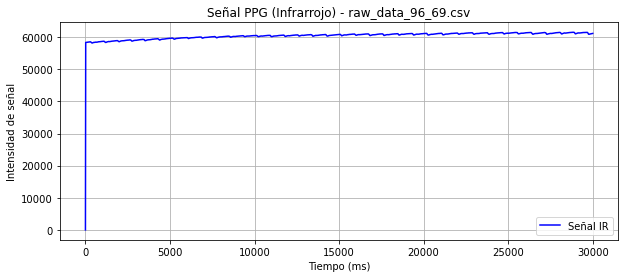

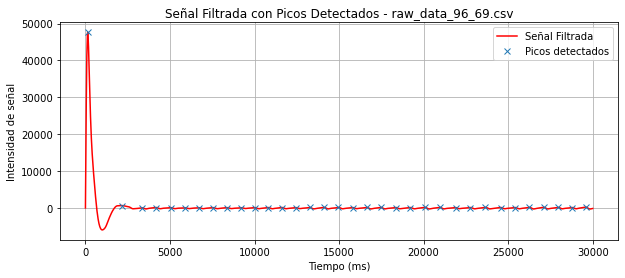

Frecuencia cardíaca estimada para raw_data_96_69.csv: 67.24 bpm


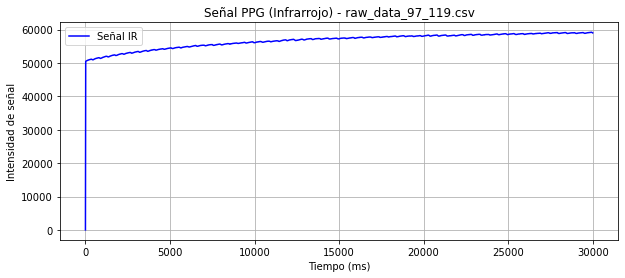

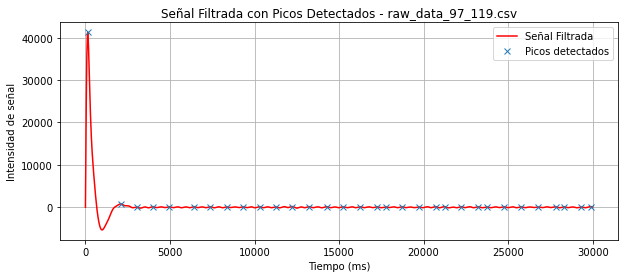

Frecuencia cardíaca estimada para raw_data_97_119.csv: 62.53 bpm


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
import os

# 1. Definir la carpeta con los archivos CSV
folder_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2"

# 2. Funciones de filtrado (Butterworth)
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut=0.5, highcut=3.0, fs=60, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    return filtfilt(b, a, data)

# 3. Procesar cada archivo CSV en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):  # Asegurarse de que es un archivo CSV
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, sep=";")

        # 4. Visualizar la señal PPG (IR)
        plt.figure(figsize=(10, 4))
        plt.plot(df["Tiempo (ms)"], df["IR"], label="Señal IR", color="blue")
        plt.xlabel("Tiempo (ms)")
        plt.ylabel("Intensidad de señal")
        plt.title(f"Señal PPG (Infrarrojo) - {filename}")
        plt.legend()
        plt.grid(True)
        plt.show()

        # 5. Filtrar la señal
        fs = 1000 / df["Tiempo (ms)"].diff().mean()  # Calcular frecuencia de muestreo
        df["IR_filtrada"] = bandpass_filter(df["IR"], fs=fs)

        # 6. Detectar picos para calcular la frecuencia cardíaca
        peaks, _ = find_peaks(df["IR_filtrada"], distance=fs/2)  # Separación mínima de 0.5s (~30 latidos/min)

        # Graficar señal filtrada y picos detectados
        plt.figure(figsize=(10, 4))
        plt.plot(df["Tiempo (ms)"], df["IR_filtrada"], label="Señal Filtrada", color="red")
        plt.plot(df["Tiempo (ms)"].iloc[peaks], df["IR_filtrada"].iloc[peaks], "x", label="Picos detectados")
        plt.xlabel("Tiempo (ms)")
        plt.ylabel("Intensidad de señal")
        plt.title(f"Señal Filtrada con Picos Detectados - {filename}")
        plt.legend()
        plt.grid(True)
        plt.show()

        # 7. Calcular frecuencia cardíaca
        rr_intervals = df["Tiempo (ms)"].iloc[peaks].diff().dropna()  # Diferencias entre picos
        global_hr = 60000 / rr_intervals.mean()  # Convertir a latidos por minuto (bpm)
        print(f"Frecuencia cardíaca estimada para {filename}: {global_hr:.2f} bpm")


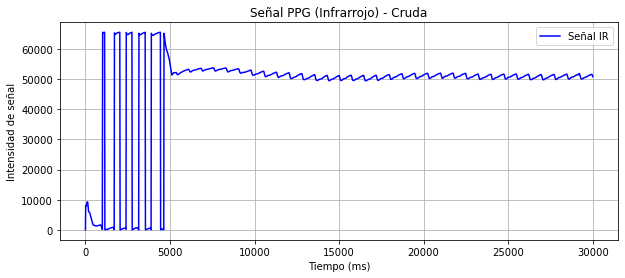

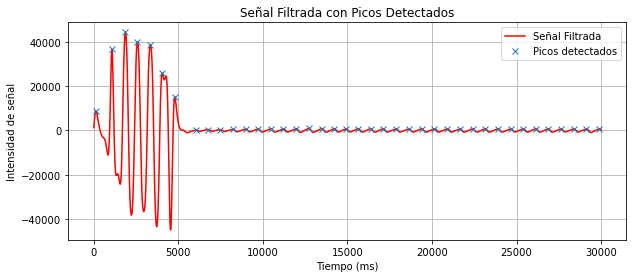

Frecuencia cardíaca estimada: 78.62 bpm


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# 1. Cargar los datos
file_path = file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_98_81.csv"
df = pd.read_csv(file_path, sep=";")

# 2. Visualizar la señal PPG (IR)
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR"], label="Señal IR", color="blue")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal PPG (Infrarrojo) - Cruda")
plt.legend()
plt.grid(True)
plt.show()

# 3. Filtrar la señal (Paso banda 0.5 - 3 Hz)
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut=0.5, highcut=3.0, fs=60, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    return filtfilt(b, a, data)

fs = 1000 / (df["Tiempo (ms)"].diff().mean())  # Calcular frecuencia de muestreo
df["IR_filtrada"] = bandpass_filter(df["IR"], fs=fs)

# 4. Detectar picos para calcular la frecuencia cardíaca
peaks, _ = find_peaks(df["IR_filtrada"], distance=fs/2)  # Separación mínima de 0.5s (~30 latidos/min)

# Graficar señal filtrada y picos detectados
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR_filtrada"], label="Señal Filtrada", color="red")
plt.plot(df["Tiempo (ms)"].iloc[peaks], df["IR_filtrada"].iloc[peaks], "x", label="Picos detectados")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal Filtrada con Picos Detectados")
plt.legend()
plt.grid(True)
plt.show()

# 5. Calcular frecuencia cardíaca
rr_intervals = df["Tiempo (ms)"].iloc[peaks].diff().dropna()  # Diferencias entre picos
global_hr = 60000 / rr_intervals.mean()  # Convertir a latidos por minuto (bpm)
print(f"Frecuencia cardíaca estimada: {global_hr:.2f} bpm")


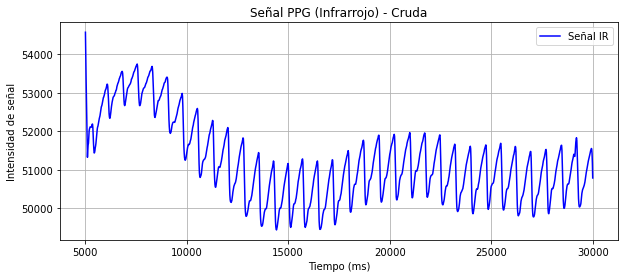

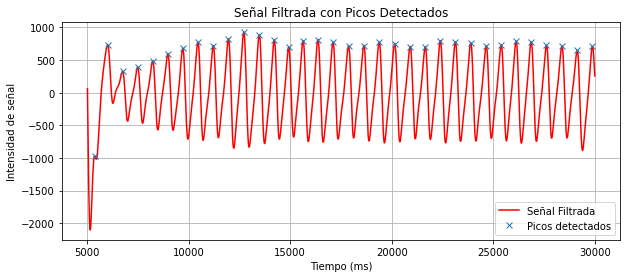

Frecuencia cardíaca estimada: 80.76 bpm


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# 1. Cargar los datos
file_path = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2\raw_data_98_81.csv"
df = pd.read_csv(file_path, sep=";")

# Eliminar los primeros 5000 ms
df = df[df["Tiempo (ms)"] >= 5000].reset_index(drop=True)

# 2. Visualizar la señal PPG (IR)
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR"], label="Señal IR", color="blue")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal PPG (Infrarrojo) - Cruda")
plt.legend()
plt.grid(True)
plt.show()

# 3. Filtrar la señal (Paso banda 0.5 - 3 Hz)
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut=0.5, highcut=3.0, fs=60, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    return filtfilt(b, a, data)

fs = 1000 / (df["Tiempo (ms)"].diff().mean())  # Calcular frecuencia de muestreo
df["IR_filtrada"] = bandpass_filter(df["IR"], fs=fs)

# 4. Detectar picos para calcular la frecuencia cardíaca
peaks, _ = find_peaks(df["IR_filtrada"], distance=fs/2)  # Separación mínima de 0.5s (~30 latidos/min)

# Graficar señal filtrada y picos detectados
plt.figure(figsize=(10, 4))
plt.plot(df["Tiempo (ms)"], df["IR_filtrada"], label="Señal Filtrada", color="red")
plt.plot(df["Tiempo (ms)"].iloc[peaks], df["IR_filtrada"].iloc[peaks], "x", label="Picos detectados")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Intensidad de señal")
plt.title("Señal Filtrada con Picos Detectados")
plt.legend()
plt.grid(True)
plt.show()

# 5. Calcular frecuencia cardíaca
rr_intervals = df["Tiempo (ms)"].iloc[peaks].diff().dropna()  # Diferencias entre picos
global_hr = 60000 / rr_intervals.mean()  # Convertir a latidos por minuto (bpm)
print(f"Frecuencia cardíaca estimada: {global_hr:.2f} bpm")
